In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization


In [39]:
train_data_dir = "dataset/train/"
validation_data_dir = "dataset/val/"
test_data_dir = "dataset/test/"

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=30,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip=True,
    fill_mode = 'nearest'
)

In [8]:
validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [11]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode = 'grayscale',
    target_size = (48,48),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True)

    

Found 25117 images belonging to 7 classes.


In [12]:
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    color_mode = 'grayscale',
    target_size = (48,48),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True)

    

Found 3585 images belonging to 7 classes.


In [14]:
class_names = list(train_generator.class_indices.keys())
class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [15]:
class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [17]:
img, label = train_generator.__next__()

In [21]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),activation='relu',input_shape=(48,48,1)))

model.add(Conv2D(64, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(128, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(256, kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(7,activation='softmax'))

In [23]:
model.compile(
    optimizer = 'adam', 
    loss='categorical_crossentropy',
    metrics = ['accuracy']
)

In [24]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 46, 46, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 44, 44, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 20, 20, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,489,095 (9.50 MB)

 Trainable params: 2,489,095 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
train_path = "data/train/"
test_path = "data/test/"


In [27]:
import os

In [28]:
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

In [30]:
history = model.fit(
    train_generator,
    steps_per_epoch = num_train_imgs//32,
    epochs = 30,
    validation_data = validation_generator,
    validation_steps = num_test_imgs//32
)

Epoch 1/30


C:\Users\AKASH\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


785/785 ━━━━━━━━━━━━━━━━━━━━ 322s 405ms/step - accuracy: 0.2403 - loss: 1.8194 - val_accuracy: 0.2937 - val_loss: 1.7231
Epoch 2/30
785/785 ━━━━━━━━━━━━━━━━━━━━ 71s 90ms/step - accuracy: 0.2908 - loss: 1.7276 - val_accuracy: 0.3816 - val_loss: 1.6338
Epoch 3/30
785/785 ━━━━━━━━━━━━━━━━━━━━ 70s 88ms/step - accuracy: 0.3648 - loss: 1.6108 - val_accuracy: 0.4491 - val_loss: 1.4530
Epoch 4/30
785/785 ━━━━━━━━━━━━━━━━━━━━ 70s 88ms/step - accuracy: 0.4194 - loss: 1.4966 - val_accuracy: 0.5026 - val_loss: 1.3171
Epoch 5/30
785/785 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.4499 - loss: 1.4217 - val_accuracy: 0.5172 - val_loss: 1.2600
Epoch 6/30
785/785 ━━━━━━━━━━━━━━━━━━━━ 70s 89ms/step - accuracy: 0.4787 - loss: 1.3605 - val_accuracy: 0.5414 - val_loss: 1.2134
Epoch 7/30
785/785 ━━━━━━━━━━━━━━━━━━━━ 72s 91ms/step - accuracy: 0.4810 - loss: 1.3503 - val_accuracy: 0.5448 - val_loss: 1.1942
Epoch 8/30
785/785 ━━━━━━━━━━━━━━━━━━━━ 61s 77ms/step - accuracy: 0.4963 - loss: 1.3056 - val_accur

In [40]:
test_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=30,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip=True,
    fill_mode = 'nearest'
)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    color_mode = 'grayscale',
    target_size = (48,48),
    batch_size = 32,
    class_mode = 'categorical',
    shuffle = True)

  

Found 7185 images belonging to 7 classes.


In [41]:
scores = model.evaluate(test_generator)


225/225 ━━━━━━━━━━━━━━━━━━━━ 64s 286ms/step - accuracy: 0.5802 - loss: 1.1196


In [42]:
scores

[1.1264564990997314, 0.5788448452949524]

In [43]:
history


In [44]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 785}

In [45]:
history.history.keys()


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [46]:
type(history.history['loss'])


list

In [47]:
len(history.history['loss'])

30

In [48]:
history.history['loss'][:5] # show loss for first 5 epochs

[1.7962104082107544,
 1.7059670686721802,
 1.5779094696044922,
 1.4756865501403809,
 1.406461477279663]

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

In [50]:
val_acc

[0.29372385144233704,
 0.38158994913101196,
 0.44909343123435974,
 0.5026499032974243,
 0.5171548128128052,
 0.5414226055145264,
 0.5447698831558228,
 0.5461645722389221,
 0.5589958429336548,
 0.5620641708374023,
 0.5562064051628113,
 0.5670850872993469,
 0.5682008266448975,
 0.5771269202232361,
 0.5774058699607849,
 0.5821478366851807,
 0.5743375420570374,
 0.5771269202232361,
 0.581311047077179,
 0.5977684855461121,
 0.5907949805259705,
 0.5857740640640259,
 0.5924686193466187,
 0.5885634422302246,
 0.5832635760307312,
 0.5810320973396301,
 0.5916317701339722,
 0.5921896696090698,
 0.5880056023597717,
 0.5947001576423645]

In [51]:
acc


[0.2528168261051178,
 0.3046940267086029,
 0.37950393557548523,
 0.4283951222896576,
 0.45598599314689636,
 0.4752956032752991,
 0.48469164967536926,
 0.4981088638305664,
 0.5064697265625,
 0.5204841494560242,
 0.5192101001739502,
 0.5254608392715454,
 0.5354142785072327,
 0.533781886100769,
 0.5428992509841919,
 0.5448501110076904,
 0.5498268008232117,
 0.5480750203132629,
 0.553250789642334,
 0.5543655753135681,
 0.5569932460784912,
 0.5563960671424866,
 0.5601385235786438,
 0.5641597509384155,
 0.5685790777206421,
 0.5639208555221558,
 0.5733168721199036,
 0.5741927623748779,
 0.5699326992034912,
 0.5731177926063538]

In [55]:
import matplotlib.pyplot as plt

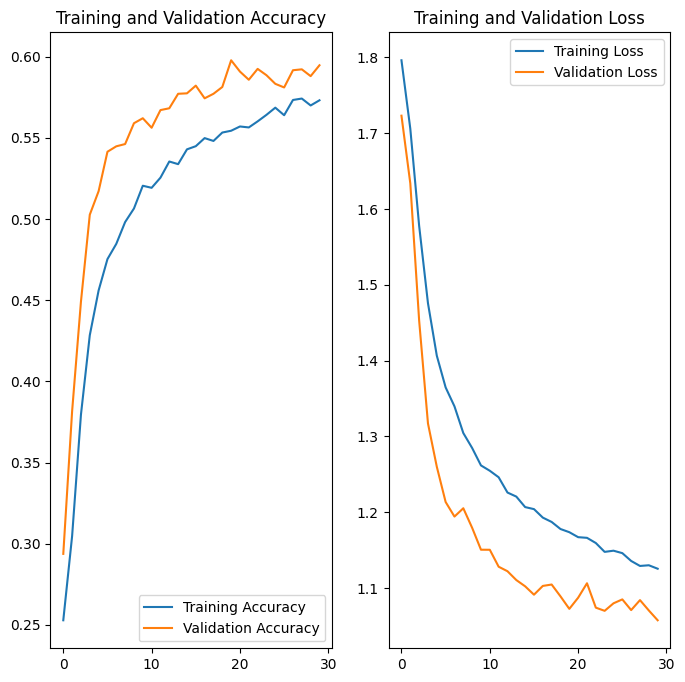

In [56]:
EPOCHS = 30

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

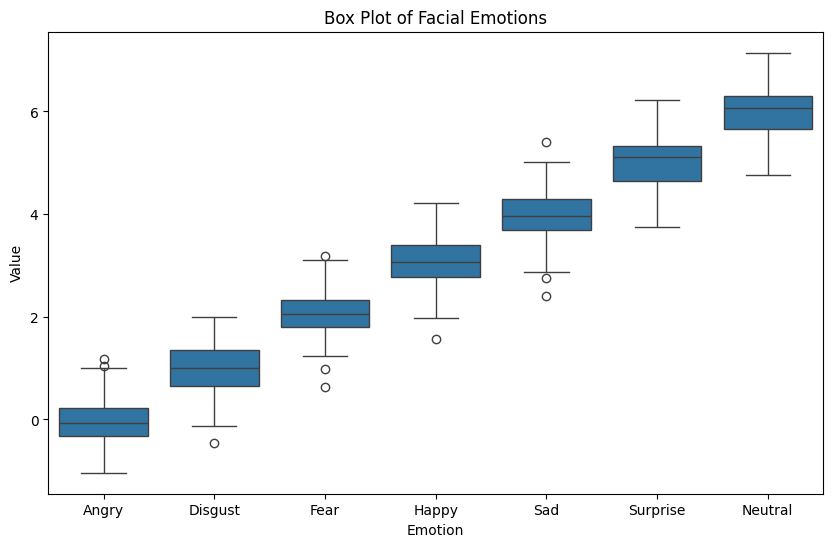

In [58]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Assuming you have a DataFrame `df` with columns 'Emotion' and 'Value'
# where 'Value' represents some numerical measure of each emotion.

# Sample data generation
data = pd.DataFrame({
    'Emotion': np.repeat(['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'], 100),
    'Value': np.concatenate([np.random.normal(loc, 0.5, 100) for loc in range(7)])
})

# Creating box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Emotion', y='Value', data=data)
plt.title('Box Plot of Facial Emotions')
plt.show()


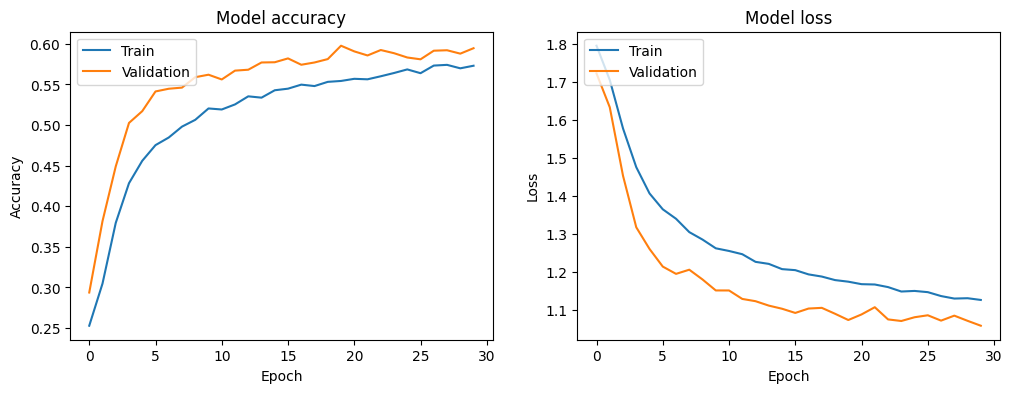

In [59]:
# Assuming `history` is the variable that stores the result of `model.fit()`
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()


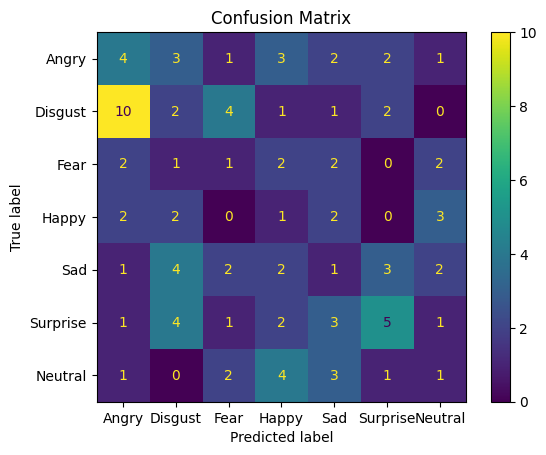

In [61]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming `y_true` are the true labels and `y_pred` are the predicted labels
# These can be obtained using `model.predict()` and then converting probabilities to class labels

# Sample true and predicted labels
y_true = np.random.randint(0, 7, 100)
y_pred = np.random.randint(0, 7, 100)

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'])

# Plot confusion matrix
cmd.plot()
plt.title('Confusion Matrix')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step


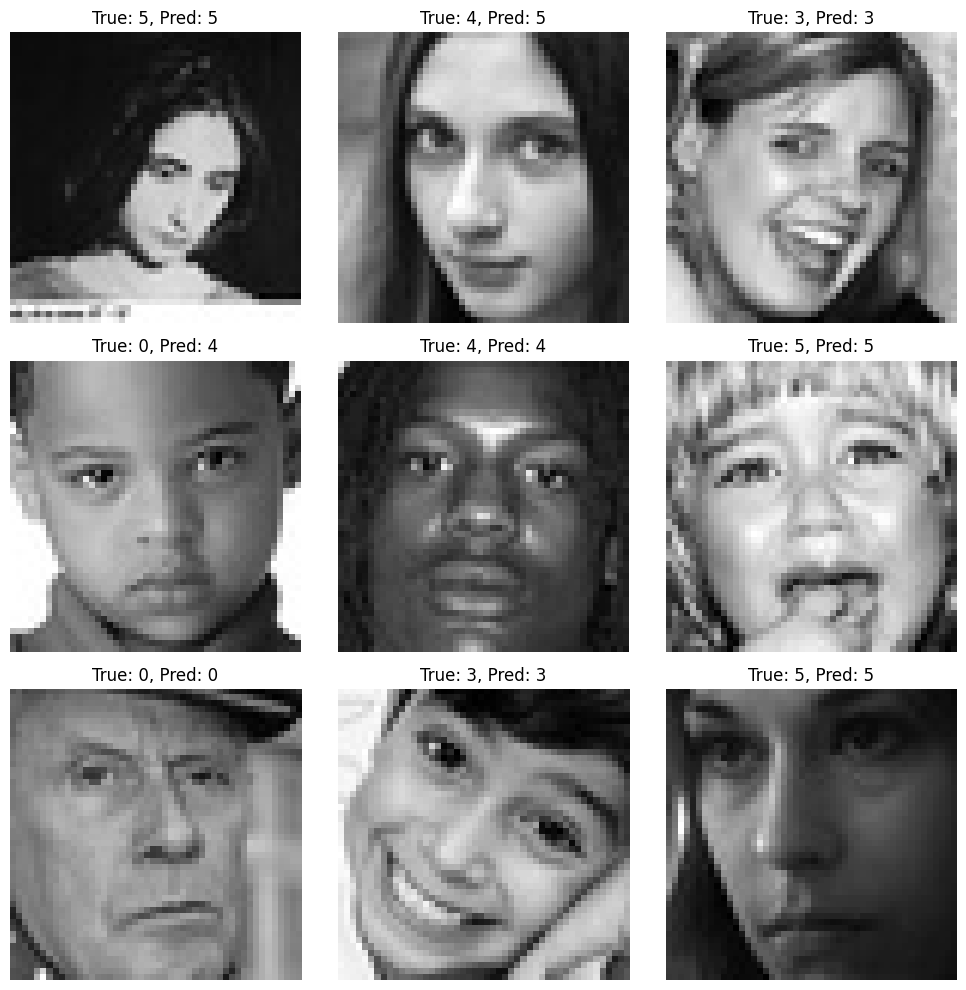

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `model` is your trained model and `validation_generator` is your data generator
# Get a batch of images and labels
images, labels = next(validation_generator)
predictions = model.predict(images)

# Convert predictions to class labels
predicted_labels = np.argmax(predictions, axis=1)
true_labels = np.argmax(labels, axis=1)

# Plot some sample images with predicted and true labels
fig, axes = plt.subplots(3, 3, figsize=(10, 10))
axes = axes.ravel()

for i in range(9):
    axes[i].imshow(images[i].reshape(48, 48), cmap='gray')
    axes[i].set_title(f"True: {true_labels[i]}, Pred: {predicted_labels[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


first image to predict
actual label: angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
predicted label: angry


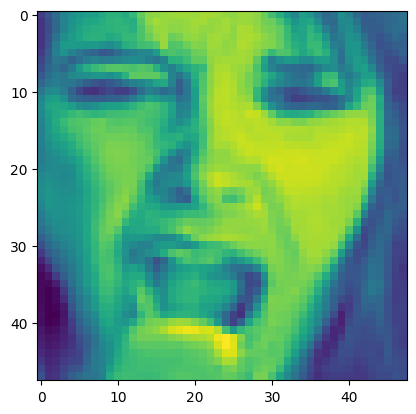

In [65]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = np.argmax(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [68]:
import tensorflow as tf

In [69]:

# function for inference

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


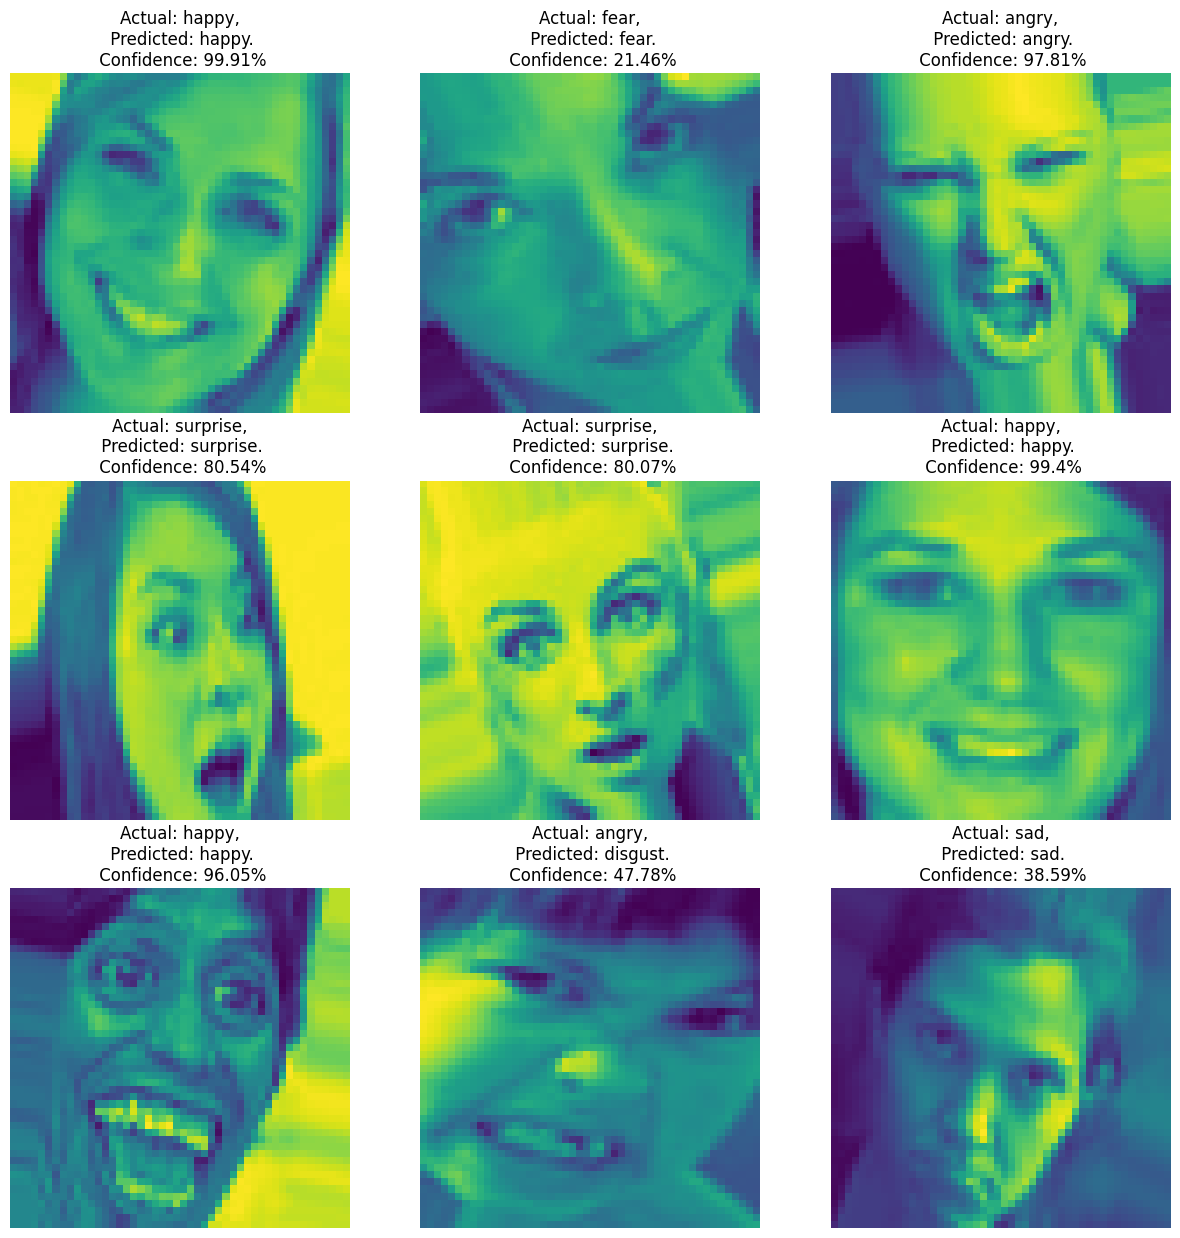

In [72]:
plt.figure(figsize=(15, 15))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[np.argmax(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [73]:
model.save("../emotion_recognition_model.h5")